Generates plots of melt freeze trends for Arctic sea ice

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os, glob

import cartopy.crs as ccrs
import cartopy.feature as cfeature

/home/apbarret/builds/anaconda/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [33]:
diri = '/disks/sidads_ftp/pub/incoming/julienne'
frzTrend = np.fromfile(os.path.join(diri,'freeze_trend_1979-2017_EASE'),dtype='float32').reshape(361,361)
mltTrend = np.fromfile(os.path.join(diri,'melt_trend_1979-2017_EASE'),dtype='float32').reshape(361,361)

frzSignf = np.fromfile(os.path.join(diri,'freeze_sign_1979-2017.EASE'),dtype='float32').reshape(361,361)*100.
mltSignf = np.fromfile(os.path.join(diri,'melt_sign_1979-2017.EASE'),dtype='float32').reshape(361,361)*100.


In [55]:
frzTrend = np.where((frzTrend == 0.) | (frzTrend >= 400.), np.nan, frzTrend)
mltTrend = np.where((mltTrend == 0.) | (mltTrend >= 400.), np.nan, mltTrend)

print (np.nanmin(frzTrend), np.nanmax(frzTrend))
print (np.nanmin(mltTrend), np.nanmax(mltTrend))

print (np.nanmin(frzSignf), np.nanmax(frzSignf))
print (np.nanmin(mltSignf), np.nanmax(mltSignf))

(-71.375977, 82.597656)
(-46.885498, 48.63916)
(0.0, 99.992371)
(0.0, 100.0)


/home/apbarret/builds/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
/home/apbarret/builds/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater_equal
  from ipykernel import kernelapp as app


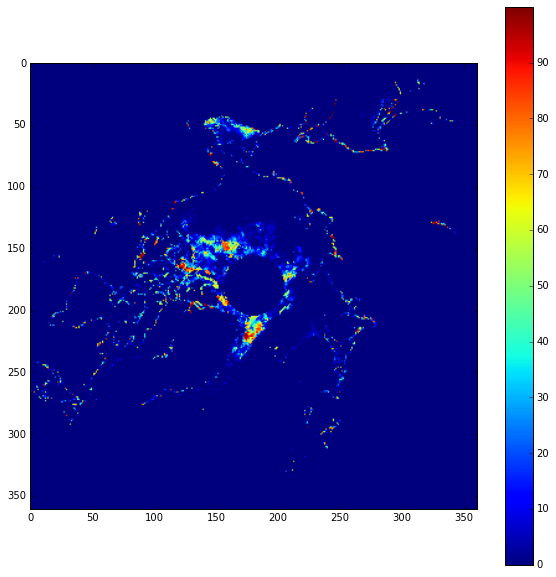

In [59]:
fig, ax = plt.subplots(figsize=(10,10))
cs = ax.imshow(frzSignf)
plt.colorbar(cs)
fig.savefig('freeze_significance.png')

## Get Coordinates

In [36]:
gdiri = '/oldhome/apbarret/projects/ancillary/maps'
lon = np.fromfile(os.path.join(gdiri,'xcenter.Na25.361x361x1.float'), dtype='float32').reshape(361,361)
lat = np.fromfile(os.path.join(gdiri,'ycenter.Na25.361x361x1.float'), dtype='float32').reshape(361,361)

In [37]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap

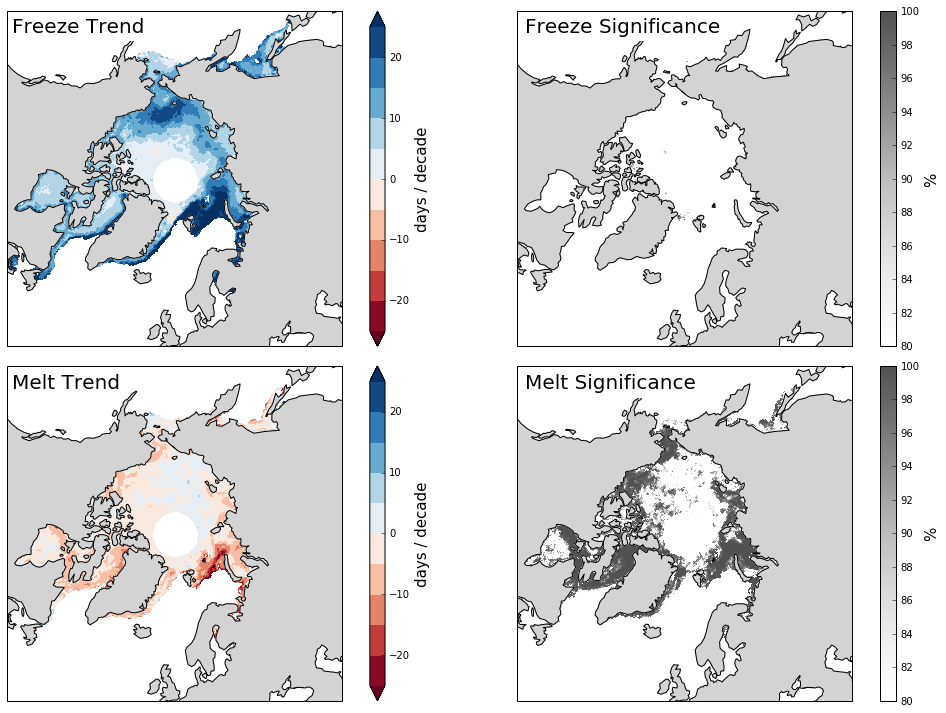

In [54]:
map_proj = ccrs.NorthPolarStereo()

coords = map_proj.transform_points(ccrs.PlateCarree(), lon, lat)

trndLevels = np.linspace(-25.,25.,11) #np.array([-50.,-40.,-30.,-20.,-10.,10.,20.,30.,40.,50.]) #np.linspace(-2.5,2.5,11)
cmap = 'RdBu'

sig_cmap = truncate_colormap(plt.get_cmap('Greys'), 0., 0.75)

fig = plt.figure(figsize=(15,10))
#fig.subplots_adjust(bottom=0.1)
#cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.8])

ax1 = plt.subplot(2,2,1,projection=map_proj)
ax1.set_extent([-180.,180.,50.,90.], ccrs.PlateCarree())
cs1 = ax1.contourf(coords[:,:,0], coords[:,:,1], frzTrend, levels=trndLevels, extend='both', cmap=cmap)
ax1.add_feature(cfeature.LAND, facecolor='lightgrey')
ax1.coastlines()
cbar1 = plt.colorbar(cs1, ax=ax1)
cbar1.set_label('days / decade', fontsize=15)
plt.figtext(0.11, 0.95, 'Freeze Trend', fontsize=20, backgroundcolor='w')

ax2 = plt.subplot(2,2,2,projection=map_proj)
ax2.set_extent([-180.,180.,50.,90.], ccrs.PlateCarree())
cs2 = ax2.pcolormesh(coords[:,:,0], coords[:,:,1], frzSignf, vmin=80., vmax=100., cmap=sig_cmap)
cbar2 = plt.colorbar(cs2, ax=ax2)
cbar2.ax.set_ylabel('%', fontsize=15)
ax2.add_feature(cfeature.LAND, facecolor='lightgrey')
ax2.coastlines()
plt.figtext(0.585, 0.95, 'Freeze Significance', fontsize=20, backgroundcolor='w')

ax3 = plt.subplot(2,2,3,projection=map_proj)
ax3.set_extent([-180.,180.,50.,90.], ccrs.PlateCarree())
cs3 = ax3.contourf(coords[:,:,0], coords[:,:,1], mltTrend, levels=trndLevels, extend='both', cmap=cmap)
ax3.add_feature(cfeature.LAND, facecolor='lightgrey')
ax3.coastlines()
cbar3 = plt.colorbar(cs3, ax=ax3)
cbar3.set_label('days / decade', fontsize=15)
plt.figtext(0.11, 0.455, 'Melt Trend', fontsize=20, backgroundcolor='w')

ax4 = plt.subplot(2,2,4,projection=map_proj)
ax4.set_extent([-180.,180.,50.,90.], ccrs.PlateCarree())
cs4 = ax4.pcolormesh(coords[:,:,0], coords[:,:,1], mltSignf, vmin=80., vmax=100., cmap=sig_cmap)
cbar4 = plt.colorbar(cs4, ax=ax4)
cbar4.ax.set_ylabel('%', fontsize=15)
ax4.add_feature(cfeature.LAND, facecolor='lightgrey')
ax4.coastlines()
plt.figtext(0.585, 0.455, 'Melt Significance', fontsize=20, backgroundcolor='w')

plt.tight_layout()

plt.savefig('freeze_melt_trends.png')